In [41]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import string


In [42]:
df1 = pd.read_csv("review_data.csv",low_memory=False)
df2=df1.head(17000)
# change the above head value to see the difference between the performance of the classifiers

In [43]:
df2.to_csv('test_review_data1.csv')

In [44]:
df2.columns


Index(['Unnamed: 0', 'review_id', 'user_id', 'business_id', 'stars', 'date',
       'text', 'useful', 'funny', 'cool'],
      dtype='object')

In [45]:
df2.columns=["ID","review_id","user_id","business_id","stars","date","text","useful","funny","cool"]
df2['negScore'] = np.where(df2['ID']>=0,1.,0.)
df2['netScore'] = np.where(df2['ID']>=0,1.,0.)
df2['posScore'] = np.where(df2['ID']>=0,1.,0.)
df2['AvgScore'] = np.where(df2['ID']>=0,1.,0.)
df2['usefulp'] = np.where(df2['useful']>=1,1,0)
df2['funnyp'] = np.where(df2['funny']>=1,1,0)
df2['coolp'] = np.where(df2['cool']>=1,1,0)
#df2['starsp'] = np.where(df2['stars']<=2,1,np.where(df2['stars']==3,2,3)) 
df2['starsp'] = np.where(df2['stars']<=2,1,df2['stars'])
df2['rating'] = np.where(df2['stars']<=2,0,df2['stars'])
df2['starsp'] = np.where(df2['starsp']>=4,3,df2['starsp'])

C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\geeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [46]:
for k in range(len(df2['rating'])):
    if df2['stars'][k]<=2:
        df2['rating'][k]=="bad"
    elif df2['stars'][k]>=4:
        df2['rating'][k]=="good"
    else:
        df2['rating'][k]=="neutral"

In [47]:

df2.fillna(df2.mean(),inplace=True)

C:\Users\geeta\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [48]:
stop_words = set(stopwords.words('english'))
#specialcharacters ={'$',':',";", "%",'\n','\r'}    
exclude = set(string.punctuation)     
for k in range(len(df2['text'])):   
    i = df2['text'][k]
    cleanedtext = ''.join(ch for ch in i if ch not in exclude)
   # cleanedtext = ''.join(ch1 for ch1 in cleanedtext if ch1 not in specialcharacters)
    sid = SentimentIntensityAnalyzer()
    ss = sid.polarity_scores(cleanedtext)
    df2.at[k,'negScore'] = ss['neg']
    df2.at[k,'netScore'] = ss['neu']
    df2.at[k,'posScore'] = ss['pos']
    df2.at[k,'AvgScore'] = ss['compound']


In [49]:
df2.to_csv('result.csv')

In [50]:
df2.columns

Index(['ID', 'review_id', 'user_id', 'business_id', 'stars', 'date', 'text',
       'useful', 'funny', 'cool', 'negScore', 'netScore', 'posScore',
       'AvgScore', 'usefulp', 'funnyp', 'coolp', 'starsp', 'rating'],
      dtype='object')

In [51]:
headers = ["AvgScore","starsp"]
modelbuilding = df2[headers]
train_x, test_x, train_y, test_y = train_test_split(modelbuilding[headers[:-1]], modelbuilding[headers[-1]], train_size=0.7)


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import*
from IPython.display import display, Markdown
from sklearn import svm

In [53]:
display(Markdown("# multi-classification model with logistic regression"))

# multi-classification model with logistic regression

In [54]:
lr = linear_model.LogisticRegression()
lr.fit(train_x, train_y)

#Train multinomial logistic regression model
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(train_x, train_y)

lr_train_acc=metrics.accuracy_score(train_y, lr.predict(train_x))
lr_test_acc=metrics.accuracy_score(test_y, lr.predict(test_x))
ml_lr_train_acc=metrics.accuracy_score(train_y, mul_lr.predict(train_x))
ml_lr_test_acc=metrics.accuracy_score(test_y, mul_lr.predict(test_x))



print("Logistic regression Train Accuracy :: ",lr_train_acc )
print("Logistic regression Test Accuracy :: ",lr_test_acc )
print("Multinomial Logistic regression Train Accuracy :: ",ml_lr_train_acc )
print("Multinomial Logistic regression Test Accuracy :: ", ml_lr_test_acc)

Logistic regression Train Accuracy ::  0.8720168067226891
Logistic regression Test Accuracy ::  0.8664705882352941
Multinomial Logistic regression Train Accuracy ::  0.8721008403361344
Multinomial Logistic regression Test Accuracy ::  0.8662745098039216


In [55]:
display(Markdown("# NAIVE BAYES"))

# NAIVE BAYES

In [56]:
NB = GaussianNB()
NB.fit(train_x, train_y)

GaussianNB(priors=None)

In [57]:
GNB_train_acc=metrics.accuracy_score(train_y, NB.predict(train_x))
GNB_test_acc= metrics.accuracy_score(test_y, NB.predict(test_x))

print("Gausiian Niave Bayes Train Accuracy :: ",GNB_train_acc )
print("Gausiian Niave Bayes Test Accuracy :: ",GNB_test_acc)

Gausiian Niave Bayes Train Accuracy ::  0.8628571428571429
Gausiian Niave Bayes Test Accuracy ::  0.8619607843137255


In [58]:
display(Markdown("# Random Forest"))

# Random Forest

In [59]:
RF = linear_model.LogisticRegression()
RF.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
RF_train_acc=metrics.accuracy_score(train_y, RF.predict(train_x))
RF_test_acc= metrics.accuracy_score(test_y, RF.predict(test_x))

print("Random Forest Train Accuracy :: ",RF_train_acc )
print("Random Forest Test Accuracy :: ",RF_test_acc )

Random Forest Train Accuracy ::  0.8720168067226891
Random Forest Test Accuracy ::  0.8664705882352941


In [61]:
display(Markdown("# SVM"))


# SVM

In [62]:
SVM_clf = LinearSVC(random_state=0)
SVM_clf.fit(train_x,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [63]:
train_SVM_acc=metrics.accuracy_score(train_y, SVM_clf.predict(train_x))
test_SVM_acc=metrics.accuracy_score(test_y, SVM_clf.predict(test_x))

In [64]:
print("SVM Train Accuracy :: ",train_SVM_acc )
print("SVM Test Accuracy :: ",test_SVM_acc)

SVM Train Accuracy ::  0.8715126050420168
SVM Test Accuracy ::  0.865686274509804


In [65]:
import seaborn as sn
import matplotlib.pyplot as plt

# Accuracies for various Classifiers

Logistic regression Train Accuracy ::  0.8720168067226891
Logistic regression Test Accuracy ::  0.8664705882352941
Multinomial Logistic regression Train Accuracy ::  0.8721008403361344
Multinomial Logistic regression Test Accuracy ::  0.8662745098039216
Gausiian Niave Bayes Train Accuracy ::  0.8628571428571429
Gausiian Niave Bayes Test Accuracy ::  0.8619607843137255
Random Forest Train Accuracy ::  0.8720168067226891
Random Forest Test Accuracy ::  0.8664705882352941
SVM Train Accuracy ::  0.8715126050420168
SVM Test Accuracy ::  0.865686274509804


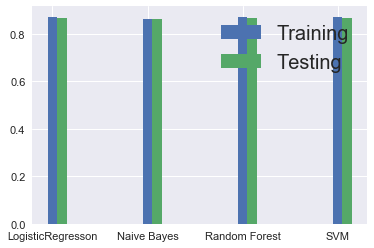

In [66]:
display(Markdown("# Accuracies for various Classifiers"))
print("Logistic regression Train Accuracy :: ",lr_train_acc )
print("Logistic regression Test Accuracy :: ",lr_test_acc )

print("Multinomial Logistic regression Train Accuracy :: ",ml_lr_train_acc )
print("Multinomial Logistic regression Test Accuracy :: ", ml_lr_test_acc)

print("Gausiian Niave Bayes Train Accuracy :: ",GNB_train_acc )
print("Gausiian Niave Bayes Test Accuracy :: ",GNB_test_acc)
print("Random Forest Train Accuracy :: ",RF_train_acc )
print("Random Forest Test Accuracy :: ",RF_test_acc )
print("SVM Train Accuracy :: ",train_SVM_acc )
print("SVM Test Accuracy :: ",test_SVM_acc)

ind = np.array([1,2,3,4])
wid = 0.1
fig, axis = plt.subplots()
#plt.figure(figsize=(10,10))
training_accuracies = [lr_train_acc,GNB_train_acc,RF_train_acc,train_SVM_acc]
testing_accuracies = [lr_test_acc,GNB_test_acc,RF_test_acc,test_SVM_acc]
labels = []
training_bars = axis.bar(ind,training_accuracies,width=wid,)
testing_bars = axis.bar(ind+wid,testing_accuracies,width=wid)
axis.set_xticks(ind)
axis.legend((training_bars[0], testing_bars[0]), ('Training', 'Testing'))

axis.set_xticklabels(('LogisticRegresson','Naive Bayes','Random Forest','SVM'))
plt.xticks(fontsize=11)  
plt.yticks(fontsize=11)
#plt.title('Comparison of Accuracies for various Classifiers')
plt.show()

# Accuracies in Tabular format 

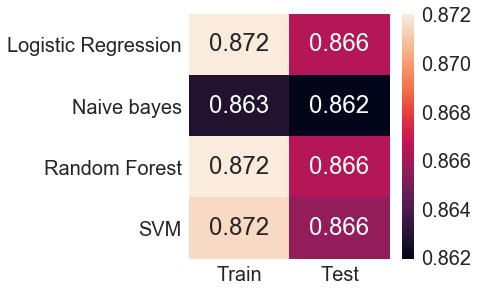

In [67]:
display(Markdown("# Accuracies in Tabular format "))
mat = np.hstack((np.array(training_accuracies).reshape(-1,1),np.array(testing_accuracies).reshape(-1,1)))
df_acc = pd.DataFrame(mat)
plt.figure(figsize = (4.5,4.5))
yticks = ['Logistic Regression','Naive bayes','Random Forest', "SVM"]
xticks = ['Train','Test']
sn.heatmap(df_acc, annot=True, fmt='.3f',xticklabels=xticks,yticklabels=yticks)
sn.set(font_scale=2)
plt.yticks(rotation=0)
#plt.title("Classification Accuracies in Tabular format")
plt.show()